In [181]:
data_path = "lbl-tcp-3.tcp"

In [182]:
datas = []
with open(data_path) as f:
    for line in f:
        line = line.split()
        datas.append((float(line[0]),int(line[5])))

In [183]:
# 按时间划分数据
delta = 1
delta_data = []

time = delta
temp = 0
for data in datas:
    if data[0] < time:
        temp += data[1]
    else:
        delta_data.append(temp/1000/delta)
        temp = 0
        time += delta

In [184]:
import numpy as np
delta_data = np.array(delta_data).reshape(-1,1)
from sklearn import preprocessing
# 调用fit方法，根据已有的训练数据创建一个标准化的转换器
scaler = preprocessing.MinMaxScaler().fit(delta_data)
delta_data = scaler.transform(delta_data)

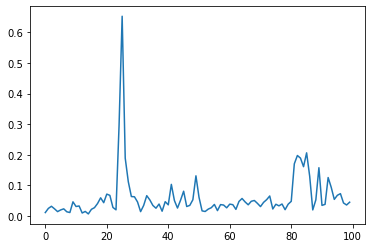

In [185]:
import matplotlib.pyplot as plt 
plt.plot(delta_data[:100])

In [186]:
import numpy as np
# 构建数据集
sequence_len = 10
X = []
Y = []
for i in range(len(delta_data)-sequence_len):
    X.append(delta_data[i:i+sequence_len])
    Y.append(delta_data[i+sequence_len])
X = np.array(X)
Y = np.array(Y)

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05,shuffle=False)

In [188]:
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Input, Model,Sequential
from keras.layers import  Dropout, Dense,LSTM 
from keras.optimizers import Adam
from keras.utils import plot_model
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_len,1)))
model.add(Dense(1,activation="sigmoid"))
optimizer = Adam(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mape'])
model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 64)                16896     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [189]:
history = model.fit(X_train, Y_train, epochs=200, batch_size = 512,verbose=0,validation_data = (X_test, Y_test))

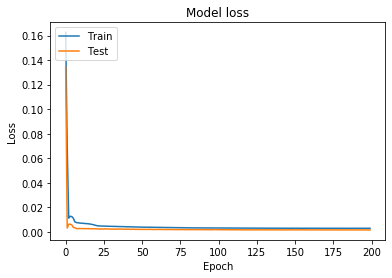

In [190]:
import matplotlib.pyplot as plt
# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [191]:
X_train_predict = model.predict(X_train)
X_train_predict_plot = np.append(X_train[0],X_train_predict)

In [192]:
X_test_predict = model.predict(X_test)
X_test_predict = X_test_predict.reshape(X_test_predict.shape[0],1)

In [193]:
X_test_predict_plot = np.full((len(delta_data),1),np.nan)
X_test_predict_plot[len(X_train):len(X_train)+len(X_test[0]),:] = X_test[0]
X_test_predict_plot[len(X_train)+len(X_test[0]):,:] = X_test_predict

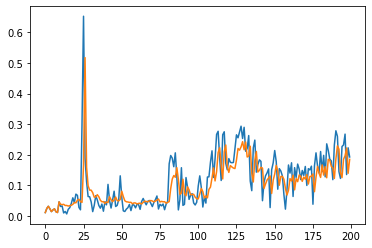

In [194]:
plt.plot(delta_data[:200])
plt.plot(X_train_predict_plot[:200])

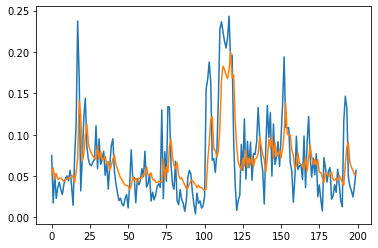

In [195]:
plt.plot(delta_data[-200:])
plt.plot(X_test_predict_plot[-200:])